In [34]:
from opponent_analysis.data import Data
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from mplsoccer.utils import FontManager
import numpy as np

In [2]:
data=Data()
df=data.get_data()

2024-01-04 13:38:49.217 
  command:

    streamlit run /Users/borgwardt/Library/Caches/pypoetry/virtualenvs/euro2022-jflC4-0A-py3.11/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-01-04 13:38:49.219 No runtime found, using MemoryCacheStorageManager
2024-01-04 13:38:49.220 No runtime found, using MemoryCacheStorageManager
2024-01-04 13:38:49.889 No runtime found, using MemoryCacheStorageManager


In [32]:
df[["location","pass_end_location","team","match_id","player","pass_outcome","pass_goal_assist","pass_shot_assist"]].dropna(subset=["location","pass_end_location"])

,location,pass_end_location,team,match_id,player,pass_outcome,pass_goal_assist,pass_shot_assist
6,"[60.0, 40.0]","[41.6, 36.5]",Switzerland Women's,3835331,Ramona Bachmann,NaN,NaN,NaN
7,"[41.8, 32.4]","[39.2, 8.5]",Switzerland Women's,3835331,Lia Wälti,NaN,NaN,NaN
8,"[38.6, 8.1]","[25.1, 20.7]",Switzerland Women's,3835331,Eseosa Aigbogun,NaN,NaN,NaN
9,"[25.5, 22.4]","[9.7, 33.7]",Switzerland Women's,3835331,Luana Bühler,NaN,NaN,NaN
10,"[10.3, 27.1]","[12.9, 7.6]",Switzerland Women's,3835331,Gaëlle Thalmann,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
102687,"[18.1, 66.4]","[25.2, 73.9]",Austria Women's,3835319,Sarah Puntigam,NaN,NaN,NaN
102688,"[31.4, 74.7]","[48.9, 68.2]",Austria Women's,3835319,Marie Therese Höbinger,Incomplete,NaN,NaN
102689,"[42.1, 14.2]","[27.5, 33.5]",England Women's,3835319,Leah Williamson,NaN,NaN,NaN
102690,"[27.3, 30.6]","[54.3, 70.4]",England Women's,3835319,Mary Alexandra Earps,NaN,NaN,NaN


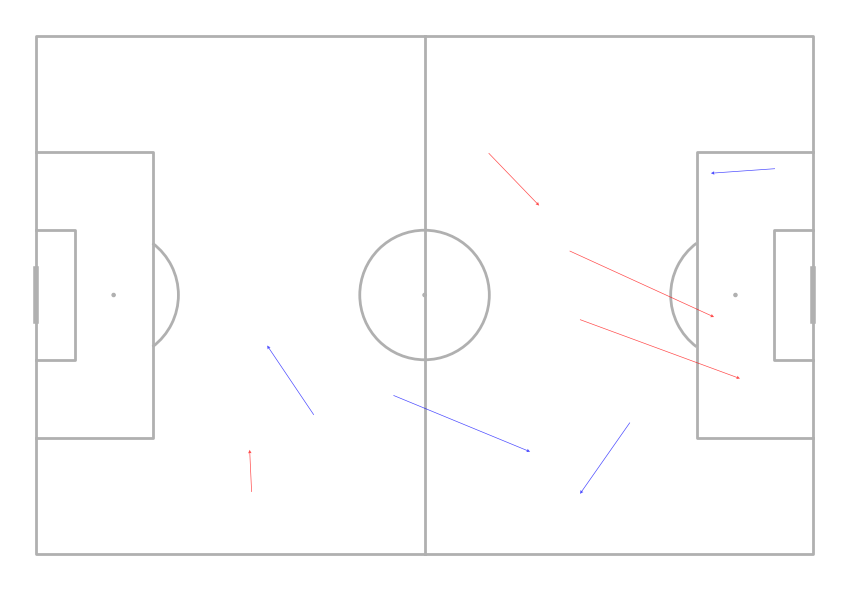

In [38]:
filtered_data=df[["location","pass_end_location","team","match_id","player","pass_outcome","pass_goal_assist","pass_shot_assist"]].dropna(subset=["location","pass_end_location"])

filtered_data=filtered_data[(filtered_data['team'] == "England Women's") ]
match_id=filtered_data.match_id.unique()[0]
filtered_data=filtered_data[(filtered_data['match_id'] == match_id) ]
player=filtered_data.player.unique()[10]
filtered_data=filtered_data[(filtered_data['player'] == player) ]
# Create the figure
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

# Initialize the pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2)

pitch.draw(ax=ax)

#font_manager = FontManager()

for idx, row in filtered_data.iterrows():
    if row["pass_outcome"] is not np.NaN:
        color="red"
        width=0.5
    elif  row["pass_shot_assist"] is not np.NaN:
        color="silver"
        width=1
    elif row["pass_goal_assist"] is not np.NaN:
        color="gold"
        width=2
    else:
        color="blue"
        width=0.5
    pitch.arrows(row['location'][0], row['location'][1],
                 row['pass_end_location'][0], row['pass_end_location'][1],
                 ax=ax, width=width, headwidth=5, color=color, zorder=3, alpha=0.7)
return fig
st.pyplot(fig)

In [42]:
df[["location","pass_end_location","team","match_id","player"]].dropna().player.unique().append(["all"])#.pass_outcome.value_counts()
#df.columns.values[:50]

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
# Specify the points
points = [
    (36.1, 28.3),
    (36.2, 29.2),
    (43.0, 61.5)
]

# Separate x and y coordinate lists
x_coords, y_coords = zip(*points)

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

# Initialize the pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2)

# Create the pitch plot
pitch.draw(ax=ax)

# Calculate the average y-coordinate
average_coord = sum(x_coords) / len(x_coords)

# Draw horizontal line through the middle of the points
ax.vlines(x=average_coord, ymin=0, ymax=pitch.dim.bottom, color='blue', linestyle='--', linewidth=2, alpha=0.6)

# Plot the points
markers = pitch.scatter(x_coords, y_coords, s=150, color='red', edgecolors="black", zorder=3, ax=ax)

# Show the plot
plt.show()